In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from google.colab.patches import cv2_imshow

READING IMAGE

In [ ]:
img=mpimg.imread('chromosomes.jpg')
print(img)
print(img.shape)

[[[ 20  75 254]
  [ 20  75 254]
  [ 20  75 254]
  ...
  [ 21  77 252]
  [ 22  78 253]
  [ 22  78 253]]

 [[ 20  75 254]
  [ 20  75 254]
  [ 20  75 254]
  ...
  [ 21  76 254]
  [ 21  76 254]
  [ 22  77 255]]

 [[ 20  75 254]
  [ 20  75 254]
  [ 20  75 254]
  ...
  [ 20  75 253]
  [ 21  76 254]
  [ 21  76 254]]

 ...

 [[ 24  79 255]
  [ 22  77 255]
  [ 20  75 253]
  ...
  [ 23  78 255]
  [ 23  78 255]
  [ 23  78 255]]

 [[ 29  81 253]
  [ 27  79 251]
  [ 25  77 251]
  ...
  [ 26  77 254]
  [ 26  77 254]
  [ 26  77 254]]

 [[ 29  81 253]
  [ 27  79 251]
  [ 25  77 251]
  ...
  [ 26  77 254]
  [ 26  77 254]
  [ 26  77 254]]]
(842, 900, 3)


PLOTTING IMAGE

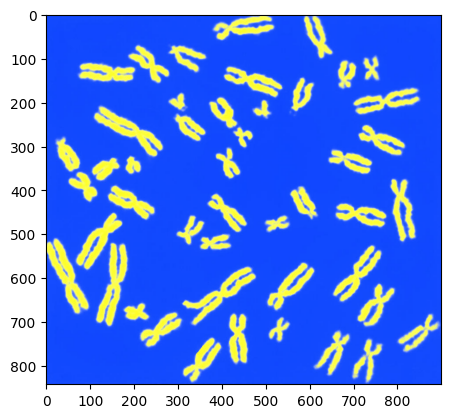

In [ ]:
imgplot=plt.imshow(img)

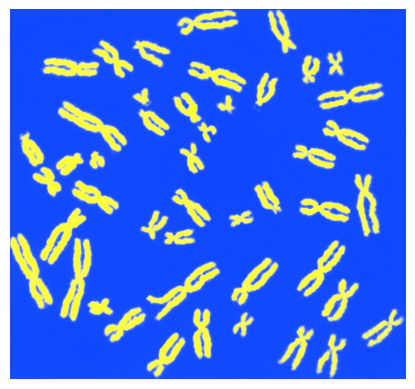

In [ ]:
#REMOVING AXES
plt.axis('off')
plt.imshow(img)

CONVERTING TO GRAYSCALE IMAGE

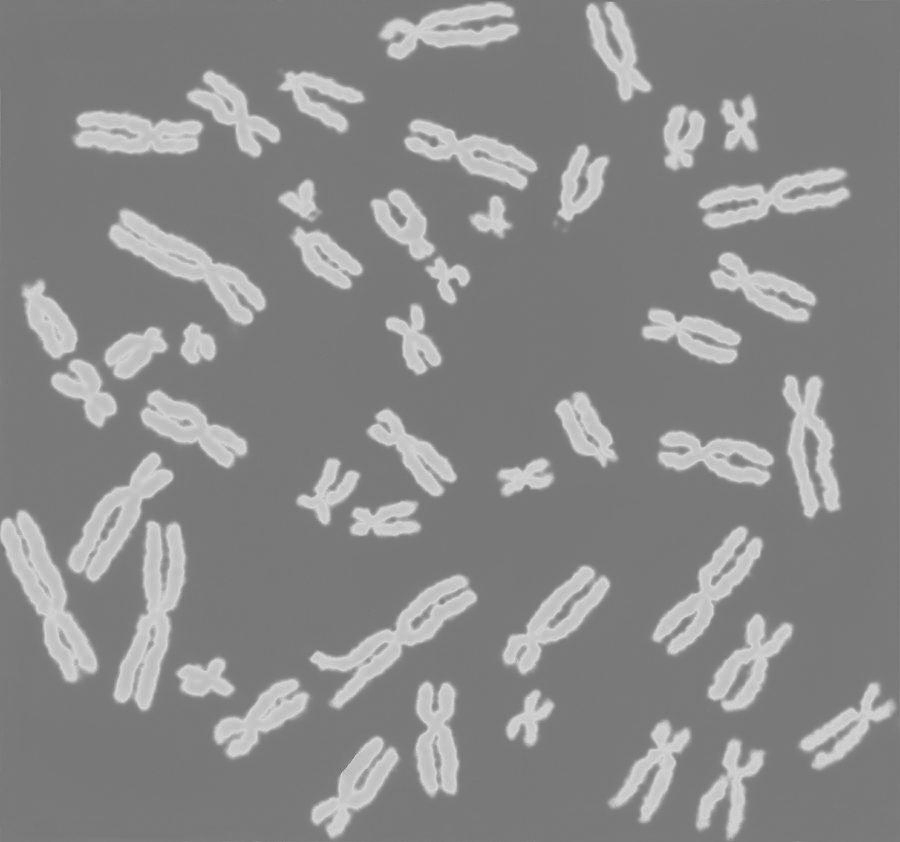

In [ ]:
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
cv2_imshow(gray_img)

Applying morphological opening for background removal

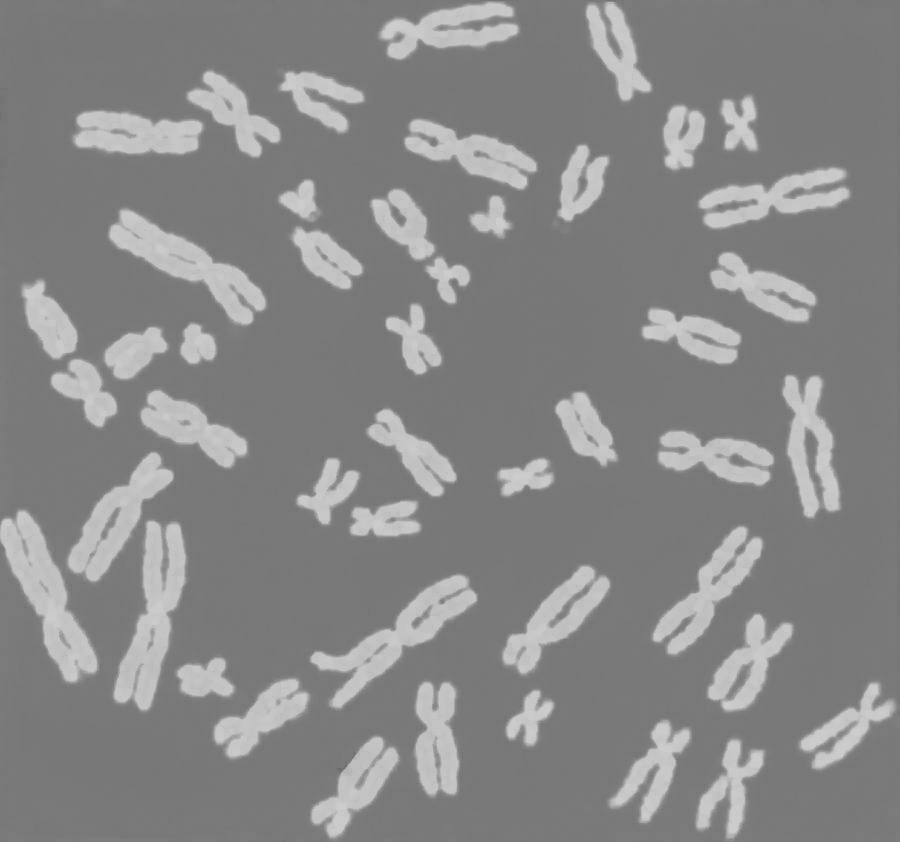

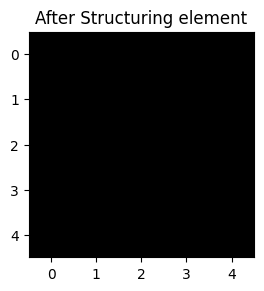

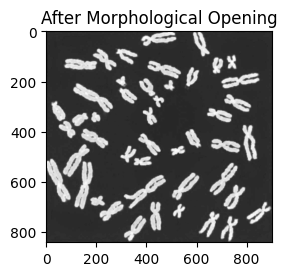

In [ ]:
morph_rect = cv2.getStructuringElement(shape=cv2.MORPH_RECT, ksize=(5, 5))
img_open = cv2.morphologyEx(gray_img, cv2.MORPH_OPEN, morph_rect)
cv2_imshow(img_open)
cv2.waitKey(0)
cv2.destroyAllWindows()


plt.subplot(1,2,1)
plt.imshow(morph_rect, cmap='gray')
plt.title('After Structuring element')
plt.show()

plt.subplot(1,2,2)
plt.imshow(img_open, cmap='gray')
plt.title('After Morphological Opening')
plt.show()

Binarization

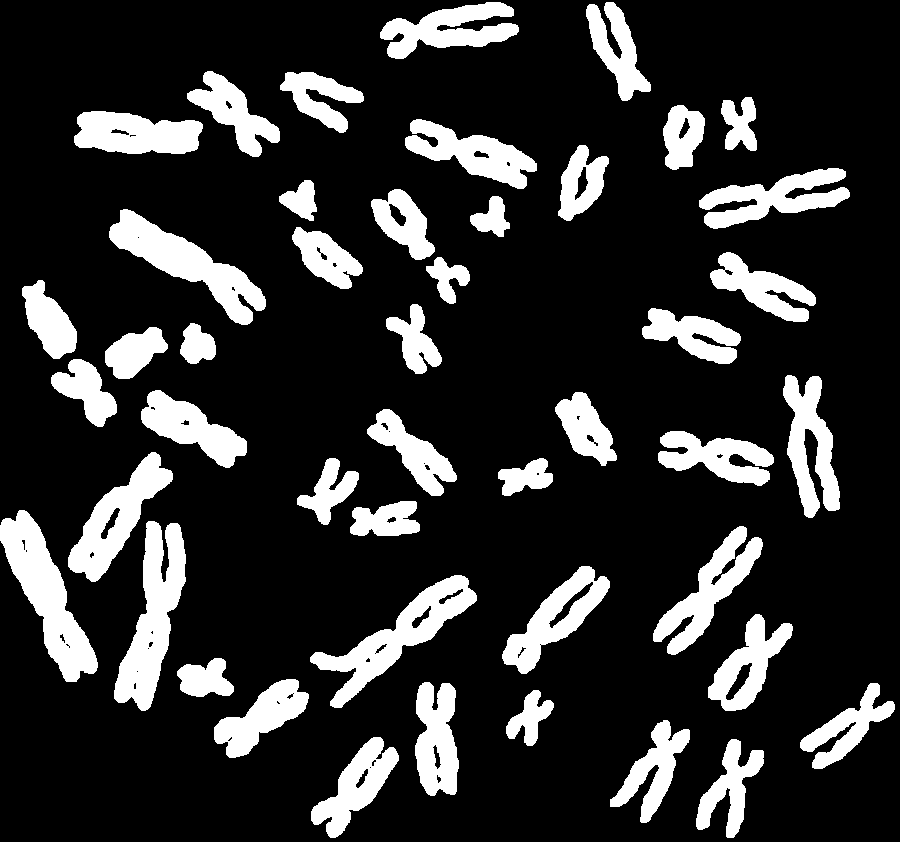

In [ ]:
ret,thresh = cv2.threshold(img_open, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
cv2_imshow(thresh)

FIND CONTOURS

In [ ]:
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
print(len(contours))

46


FEATURES

In [ ]:
import pandas as pd
df={'X':[],'Y':[],'Width':[],'Height':[],'shape_info':[],'Area':[],'Perimeter':[],'Circularity':[]}
for i in contours:
  img_area=cv2.contourArea(i)
  img_perimeter=cv2.arcLength(i,True)
  img_circularity=(4 * np.pi * img_area) / (img_perimeter ** 2)
  x,y,w,h=cv2.boundingRect(i)
  df['X'].append(x)
  df['Y'].append(y)
  df['shape_info'].append(f"{w} x {h}")
  df['Height'].append(h)
  df['Width'].append(w)
  df['Area'].append(img_area)
  df['Perimeter'].append(img_perimeter)
  df['Circularity'].append(img_circularity)
table=pd.DataFrame(df)
table



,X,Y,Width,Height,shape_info,Area,Perimeter,Circularity
0,696,739,68,99,68 x 99,2528.0,415.705624,0.183829
1,311,737,88,101,88 x 101,3550.5,367.747254,0.329914
2,610,720,80,103,80 x 103,2854.5,438.859952,0.186246
3,506,690,48,56,48 x 56,1177.5,214.409161,0.321873
4,800,683,95,86,95 x 86,2626.0,446.901582,0.165227
5,415,682,44,114,44 x 114,3700.0,370.592927,0.338546
6,214,679,95,79,95 x 79,3316.5,303.178713,0.453411
7,177,658,57,39,57 x 39,1446.5,183.095453,0.542217
8,708,614,85,97,85 x 97,3664.0,341.906634,0.393868
9,310,575,167,133,167 x 133,5970.5,547.712764,0.250101


Bounding box

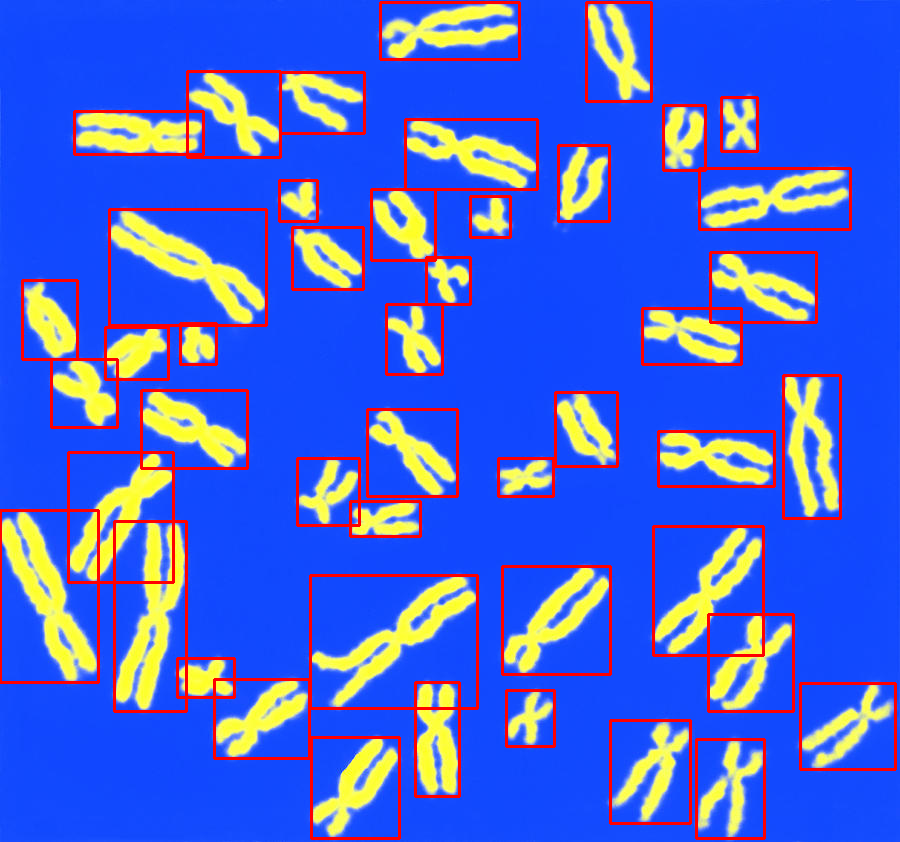

In [ ]:
for c in contours:
  x,y,w,h=cv2.boundingRect(c)
  cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
# plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
# plt.title('Bounding Box')
# plt.show()
cv2_imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

NORMALISING

In [ ]:
n_df = (table - table.mean()) / table.std()
Q1 = n_df.quantile(0.25)
Q3 = n_df.quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR
outliers = ((n_df < lower) | (n_df > upper)).sum().sum()
outliers

<ipython-input-54-23f3017b18ad>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  n_df = (table - table.mean()) / table.std()
<ipython-input-54-23f3017b18ad>:1: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  n_df = (table - table.mean()) / table.std()
<ipython-input-54-23f3017b18ad>:2: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q1 = n_df.quantile(0.25)
<ipy

2

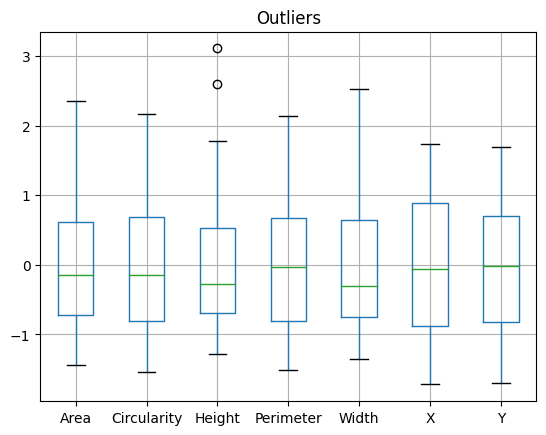

In [ ]:
n_df.boxplot()
plt.title('Outliers')
plt.show()